In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report

In [2]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target
print(f'Number of classes: {len(np.unique(iris_y))}')
print(f'Number of data points: {len(iris_y)}')

Number of classes: 3
Number of data points: 150


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=50)

print(f'Training size: {len(y_train)}')
print(f'Test size: {len(y_test)}')

Training size: 100
Test size: 50


In [4]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8, p=2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Print result for 20 test data points')
print('Predicted labels: ', y_pred[20:40])
print('Ground truth: ', y_test[20:40])

print('Accuracy of 10NN with major voting: %.2f %%' %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Print result for 20 test data points
Predicted labels:  [1 2 1 0 1 0 0 0 0 0 0 2 0 2 0 1 2 0 2 1]
Ground truth:  [1 2 1 0 1 0 0 0 0 0 0 2 0 2 0 1 2 0 2 1]
Accuracy of 10NN with major voting: 98.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [5]:
clf = neighbors.KNeighborsClassifier(n_neighbors=8, p=2, weights='distance')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy of 10NN with major voting: %.2f %%' %(100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy of 10NN with major voting: 98.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [6]:
def myweight(distance):
    sigma2 = .5 # we can change this number
    return np.exp(-distance**2/sigma2)

clf = neighbors.KNeighborsClassifier(n_neighbors=8, p=2, weights=myweight)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy of 10NN with major voting: %.2f %%' % (100*accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))

Accuracy of 10NN with major voting: 98.00 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.97        14

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [7]:
df = pd.read_csv('TeleCustomers.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

X = df.drop(['custcat'], axis=1)
y = df['custcat']

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
k = 4
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
pred_y = neigh.predict(X_test)
print('Accuracy of model at k=4 is ', metrics.accuracy_score(y_test, pred_y))


Accuracy of model at k=4 is  0.32


Minimum error:-  0.615  at K  37


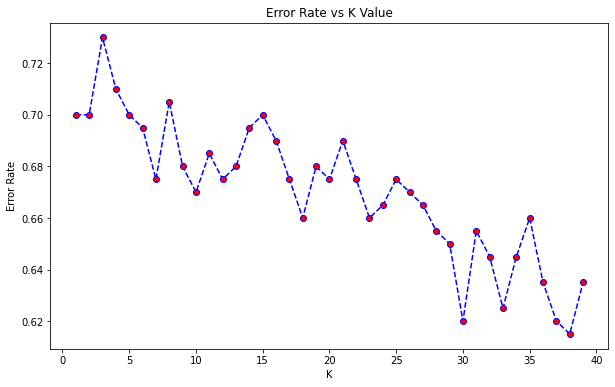

In [10]:
error_rate = []
for i in range(1, 40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red')

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('Minimum error:- ', min(error_rate), ' at K ', error_rate.index(min(error_rate)))

Maximum accuracy: -  0.385  at K=  37


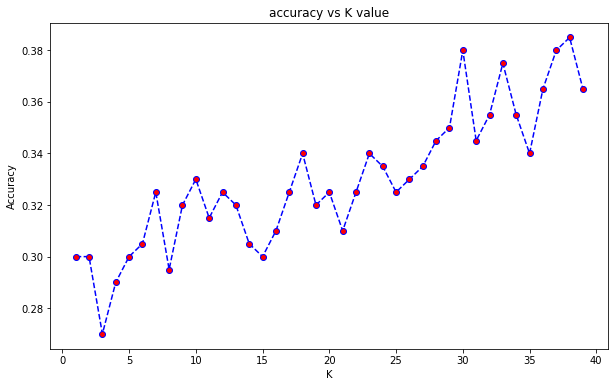

In [11]:
acc = []

#Will take some time
for i in range(1, 40):
    knn = neighbors.KNeighborsClassifier(n_neighbors=i, weights='distance')
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, pred_i))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), acc, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='red')

plt.title('accuracy vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print('Maximum accuracy: - ', max(acc), ' at K= ', acc.index(max(acc)))

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('slr', LinearRegression())])

knn_lr = KNeighborsRegressor(n_neighbors=3)

In [18]:
df = pd.read_csv('cruise_ship_info.csv')
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [19]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

In [27]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:, 0:4].values

y = df[cols_selected]['crew']
sc_y = StandardScaler()
train_score_lr = []
train_score_knn = []


In [ ]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr,
                               np.mean(cross_val_score(pipe_lr,
                                                       X_train, y_train_std,
                                                       scoring='r2', cv=10)))
    train_score_knn = np.append(train_score_knn,
                                np.mean(cross_val_score(knn_lr,
                                                        X_train, y_train_std,
                                                        scoring='r2', cv=10)))
    

train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knn = np.mean(train_score_knn)
train_std_knn = np.std(train_score_knn)

print('R2 train for lr %.3f +/- %.3f' % (train_mean_lr, train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' % (train_mean_knn, train_std_knn))
    


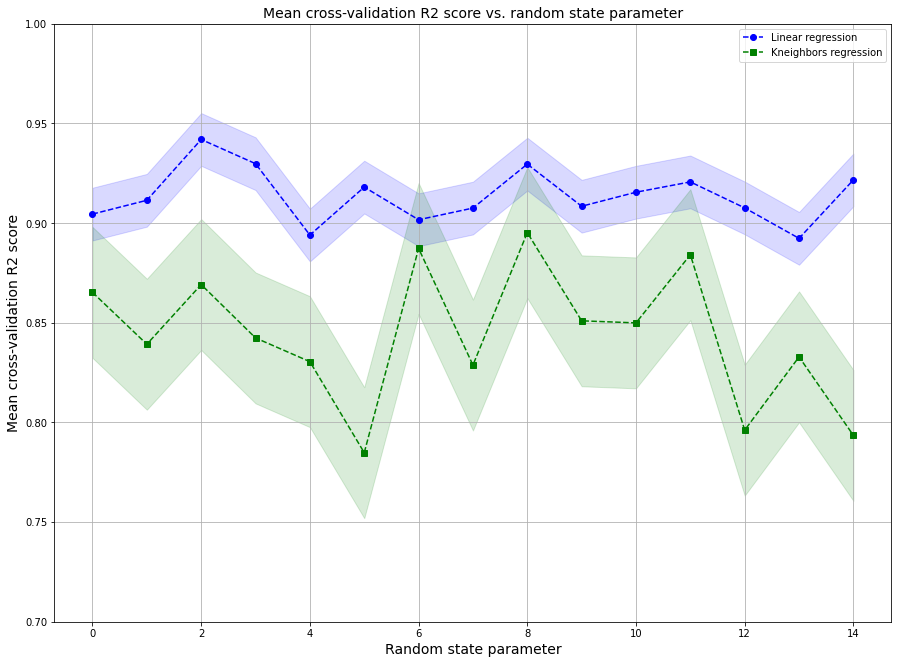

In [29]:
plt.figure(figsize=(15, 11))
plt.plot(range(n), train_score_lr, color='blue', linestyle='dashed',
         marker='o', markerfacecolor='blue', label='Linear regression')
plt.fill_between(range(n),
                 train_score_lr + train_std_lr,
                 train_score_lr - train_std_lr,
                 alpha=0.15, color='blue')

plt.plot(range(n), train_score_knn, color='green', linestyle='dashed',
         marker = 's', markerfacecolor='green', label='Kneighbors regression')
plt.fill_between(range(n),
                 train_score_knn + train_std_knn,
                 train_score_knn - train_std_knn,
                 alpha=0.15, color='green')

plt.grid()
plt.ylim(0.7, 1)
plt.title('Mean cross-validation R2 score vs. random state parameter', size=14)
plt.xlabel('Random state parameter', size=14)
plt.ylabel('Mean cross-validation R2 score', size=14)
plt.legend()
plt.show()

In [1]:
import csv
import numpy as np
import math

In [2]:
def loadData(path):
    f = open(path, 'r')
    data = csv.reader(f) #csv format
    data = np.array(list(data)) #convert to matrix
    data = np.delete(data, 0, 0) #delete header
    data = np.delete(data, 0, 1) #delete index
    np.random.shuffle(data) #shuffle data

    f.close()
    trainSet = data[:100] #training data from 1->100
    testSet = data[100:] #the others is testing data
    return trainSet, testSet


In [3]:
def calcDistance(pointA, pointB, numOfFeature=4):
    tmp = 0
    for i in range(numOfFeature):
        tmp += (float(pointA[i]) - float(pointB[i]))**2
    
    return math.sqrt(tmp)


In [4]:
def kNearestNeighbor(trainSet, point, k):
    distances = []
    for item in trainSet:
        distances.append({
            'label': item[-1],
            'value': calcDistance(item, point)
        })
    distances.sort(key= lambda x: x['value'])
    labels = [item['label'] for item in distances]
    return labels[:k]

In [5]:
def voteTheDistance(array):
    labels = set(array)
    result = ''
    maxOccur = 0
    for label in labels:
        num = array.count(label)
        if num > maxOccur:
            maxOccur = num
            result = label
    
    return result

In [6]:
k = 5
trainingSet, testingSet = loadData('Iris.csv')

#print(testingSet)
for item in testingSet:
    knn = kNearestNeighbor(trainSet=trainingSet, point=item, k=k)
    result = voteTheDistance(knn)
    print(f'GT = {item[-1]}, Prediction: = {result}')

GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-versicolor, Prediction: = Iris-versicolor
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-versicolor, Prediction: = Iris-versicolor
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-versicolor, Prediction: = Iris-versicolor
GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-versicolor, Prediction: = Iris-versicolor
GT = Iris-versicolor, Prediction: = Iris-versicolor
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-virginica, Prediction: = Iris-versicolor
GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-setosa, Prediction: = Iris-setosa
GT = Iris-virginica, Prediction: = Iris-virginica
GT = Iris-versicolor, Predictio

### 1. How to select K in KNN

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#Read the dataset in 
dataset = pd.read_csv(url, names=names)
dataset

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = classifier.predict(X_test)
y_pred == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True])

In [14]:
from sklearn.metrics import accuracy_score, classification_report
print(round(accuracy_score(y_test, y_pred), 2))

0.97


In [15]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Text(0, 0.5, 'Accuracy')

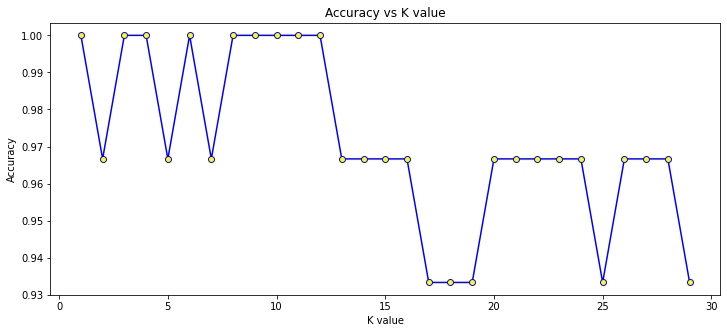

In [16]:
error = []

#calculating accuracy for K-values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(accuracy_score(y_test, pred_i))

plt.figure(figsize=(12, 5))
plt.plot(range(1, 30), error, color='blue', marker='o',
         markerfacecolor='yellow')

plt.title('Accuracy vs K value')
plt.xlabel('K value')
plt.ylabel('Accuracy')

 ### 2. Problem with K odd and even

In [17]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [18]:
penguin = pd.read_csv('penguins.csv')
penguin.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


In [19]:
penguin.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [20]:
x = penguin[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = penguin[['species']]

In [21]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=4)

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
def knn_modified(X_train, y_train, X_test, k):
    pred = []
    for j in range(len(X_test)):
        distance = []
        min_dist = math.inf
        for i in range(len(X_train)):
            eulidean_distance = np.sqrt(np.sum((X_test[j,] - X_train[i])**2))
            if eulidean_distance < min_dist:
                distance.append((eulidean_distance, i))
            else:
                continue

        #sort the list by distance
        distance.sort()

        #Get the row index of its nearest neighbour
        neighbours = []

        for j in range(k):
            neighbours.append(distance[j][1])

        #append the actual target in list
        target = []
        for l in range(k):
            target.append(np.array(y_train)[neighbours[l]][0])

        #Create a function for counting
        count = {}
        for t in target:
            count[t] = count.get(t, 0) + 1

        #Create a list with (value, key) pair
        pairs = []
        for key in count:
            pairs.append((count[key], key))
        
        #Sort the pair and get the most occuring word
        pairs.sort(reverse=True)
        if k%2 == 0:
            even = []
            for i in range(0, len(pairs)):
                if pairs[0][0] == pairs[i][0]:
                    even.append(pairs[i][1])

            #print('Arranging in decreasing order: ', even)
            for j in neighbours:
                if y_train[j][0] in even:
                    pred.append(y_train[j][0])
                    #print('Value with the least distance classifier: ', y_train[j][0])
                    #print('Picking classifier based on least distance: ', y_train[j][0])
                    break
                else:
                    pred.append(pairs[0][1])
                    break
            
        else:
            pred.append(pairs[0][1])

    return (pred)

In [25]:
n = 2
pred = knn_modified(X_train, y_train, X_test, k=n)
neighbors = list(range(1, 11))
scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute', metric='euclidean')
    pred1 = knn.fit(X_train, y_train)
    pred = pred1.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    scores.append(accuracy)

scores1 = []
neighbors = list(range(1, 11))
for i in neighbors:
    pred = knn_modified(X_train, y_train, X_test, k=i)
    accuracy = accuracy_score(y_test, pred)
    scores1.append(accuracy)

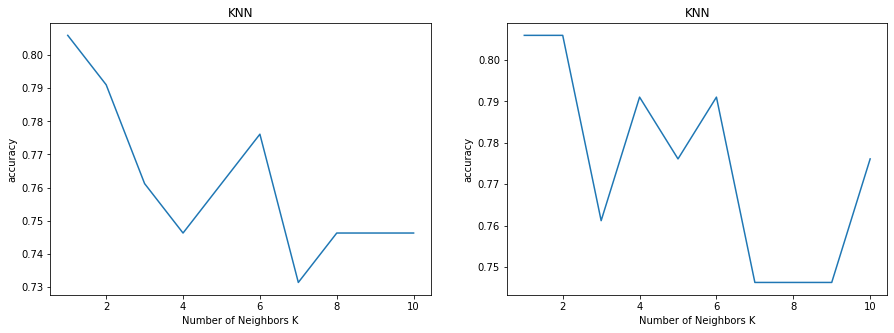

In [35]:
MSE = [x for x in scores]

MSE1 = [x for x in scores1]

fg, ax = plt.subplots(1, 2, figsize=(15,5))

ax[0].plot(neighbors, MSE)
ax[0].set_xlabel('Number of Neighbors K')
ax[0].set_ylabel('accuracy')
ax[0].set_title('KNN')

ax[1].plot(neighbors, MSE1)
ax[1].set_xlabel('Number of Neighbors K')
ax[1].set_ylabel('accuracy')
ax[1].set_title('KNN')

plt.show()

In [30]:
MSE

[0.8059701492537313,
 0.7910447761194029,
 0.7611940298507462,
 0.746268656716418,
 0.7611940298507462,
 0.7761194029850746,
 0.7313432835820896,
 0.746268656716418,
 0.746268656716418,
 0.746268656716418]

$\lambda$ $\gamma$ $\alpha$ $\theta$

In [9]:
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Admin\AppData\Local\Temp\ipykernel_15544\3788955705.py:2: RuntimeWarning: divide by zero encountered in log
  y1 = np.log(x)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15544\3788955705.py:3: RuntimeWarning: divide by zero encountered in log
  y2 = np.log(1-x)


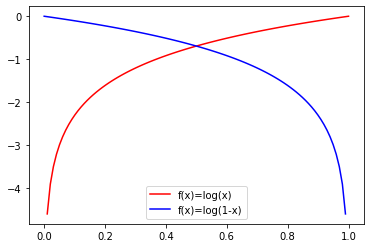

In [17]:
x = np.linspace(0, 1, 100)
y1 = np.log(x)
y2 = np.log(1-x)

plt.plot(x, y1, color='red', label='f(x)=log(x)')
plt.plot(x, y2, color='blue', label='f(x)=log(1-x)')
plt.legend()
plt.show()